##Analyzing Bike Share Dataset##

This is based on the blog post by Prof. Jake VanderPlas [Pythonic Perambulation](https://jakevdp.github.io/blog/2015/10/17/analyzing-pronto-cycleshare-data-with-python-and-pandas/)

In [1]:
!curl -O https://s3.amazonaws.com/pronto-data/open_data_year_one.zip

'curl' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import os
os.chdir(r'C:\Users\CDRONAVA\Downloads\open_data_year_one')
os.getcwd()

'C:\\Users\\CDRONAVA\\Downloads\\open_data_year_one'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

Now we load the trip data with Pandas

In [4]:
trips = pd.read_csv('2015_trip_data.csv',
                   parse_dates=['starttime','stoptime'],
                   infer_datetime_format=True)

trips.head()

trip_id           starttime            stoptime    bikeid  tripduration  \
0      431 2014-10-13 10:31:00 2014-10-13 10:48:00  SEA00298       985.935   
1      432 2014-10-13 10:32:00 2014-10-13 10:48:00  SEA00195       926.375   
2      433 2014-10-13 10:33:00 2014-10-13 10:48:00  SEA00486       883.831   
3      434 2014-10-13 10:34:00 2014-10-13 10:48:00  SEA00333       865.937   
4      435 2014-10-13 10:34:00 2014-10-13 10:49:00  SEA00202       923.923   

     from_station_name                                    to_station_name  \
0  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
1  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
2  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
3  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
4  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   

  from_station_id to_station_id       usertype  gender  birthyear  
0          CBD-06         PS-04  Annual Member    Male       1960  
1          CBD-06         PS-04  Annual Member    Male       1970  
2          CBD-06         PS-04  Annual Member  Female       1988  
3          CBD-06         PS-04  Annual Member  Female       1977  
4          CBD-06         PS-04  Annual Member    Male       1971

In [10]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142846 entries, 0 to 142845
Data columns (total 14 columns):
trip_id              142846 non-null int64
starttime            142846 non-null datetime64[ns]
stoptime             142846 non-null datetime64[ns]
bikeid               142846 non-null object
tripduration         142846 non-null float64
from_station_name    142846 non-null object
to_station_name      142846 non-null object
from_station_id      142846 non-null object
to_station_id        142846 non-null object
usertype             142846 non-null object
gender               87360 non-null object
birthyear            87360 non-null float64
date                 142846 non-null datetime64[ns]
hour                 142846 non-null int32
dtypes: datetime64[ns](3), float64(2), int32(1), int64(1), object(7)
memory usage: 15.8+ MB


In [11]:
trips.describe()

trip_id   tripduration     birthyear           hour
count  142846.000000  142846.000000  87360.000000  142846.000000
mean    80394.218494    1210.937242   1979.637843      13.590937
std     44620.988772    2096.282716     10.140537       4.564140
min       431.000000      60.008000   1936.000000       0.000000
25%     42882.250000     396.363000   1974.000000      10.000000
50%     80903.500000     646.159000   1982.000000      14.000000
75%    118938.750000    1157.145500   1987.000000      17.000000
max    156800.000000   28794.398000   1999.000000      23.000000

In [5]:
trips.shape

(142846, 12)

Each row of this trip dataset is a single ride by a single person, and data contains over 140,000 rows!

##Exploring Trips over Time

Let's start by looking at the trend in number of daily trips over the course of the year

In [6]:
# Find the start date
ind = pd.DatetimeIndex(trips.starttime)
trips['date'] = ind.date.astype('datetime64')
trips['hour'] = ind.hour

In [7]:
#Count trips by date
by_date = trips.pivot_table('trip_id', aggfunc = 'count',
                           index = 'date',
                           columns = 'usertype',)

In [9]:
by_date.head()

usertype    Annual Member  Short-Term Pass Holder
date                                             
2014-10-13            284                     125
2014-10-14            268                     223
2014-10-15            212                     101
2014-10-16            268                     127
2014-10-17            195                      99

In [14]:
pd.unique(trips['usertype'].values.ravel())

array(['Annual Member', 'Short-Term Pass Holder'], dtype=object)

In [17]:
pd.unique(trips['bikeid'].values.ravel()).shape

(482L,)

In [19]:
pd.unique(trips['from_station_name'].values.ravel()).shape

(55L,)

In [20]:
pd.unique(trips['to_station_name'].values.ravel())

array(['Occidental Park / Occidental Ave S & S Washington St',
       'King Street Station Plaza / 2nd Ave Extension S & S Jackson St',
       'City Hall / 4th Ave & James St', '1st Ave & Marion St',
       '2nd Ave & Spring St', '6th Ave S & S King St',
       'E Pine St & 16th Ave',
       'Seattle Aquarium / Alaskan Way S & Elliott Bay Trail',
       'Westlake Ave & 6th Ave', '2nd Ave & Pine St',
       'Cal Anderson Park / 11th Ave & Pine St',
       'Fred Hutchinson Cancer Research Center / Fairview Ave N & Ward St',
       "Children's Hospital / Sandpoint Way NE & 40th Ave NE",
       '3rd Ave & Broad St', 'Pier 69 / Alaskan Way & Clay St',
       '2nd Ave & Vine St', '12th Ave & NE Campus Pkwy',
       '7th Ave & Union St', 'UW Intramural Activities Building',
       'Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
       '2nd Ave & Blanchard St', '6th Ave & Blanchard St',
       '9th Ave N & Mercer St', 'Dexter Ave & Denny Way',
       'NE 42nd St & University Way NE',
    

In [21]:
pd.unique(trips['to_station_name'].values.ravel()).shape

(55L,)

In [22]:
pd.unique(trips['from_station_id'].values.ravel()).shape

(55L,)

In [23]:
pd.unique(trips['to_station_id'].values.ravel()).shape

(55L,)

In [24]:
pd.unique(trips['gender'].values.ravel())

array(['Male', 'Female', 'Other', nan], dtype=object)

In [25]:
pd.unique(trips['birthyear'].values.ravel())

array([ 1960.,  1970.,  1988.,  1977.,  1971.,  1974.,  1978.,  1983.,
        1958.,  1982.,  1984.,  1955.,  1953.,  1959.,  1950.,  1976.,
        1986.,  1967.,  1987.,  1969.,  1973.,  1989.,  1946.,  1956.,
        1951.,  1981.,  1979.,  1972.,  1990.,  1968.,  1964.,    nan,
        1952.,  1975.,  1949.,  1991.,  1985.,  1963.,  1980.,  1992.,
        1948.,  1966.,  1961.,  1965.,  1962.,  1954.,  1994.,  1957.,
        1945.,  1947.,  1993.,  1943.,  1996.,  1942.,  1998.,  1936.,
        1995.,  1944.,  1999.,  1939.,  1997.])

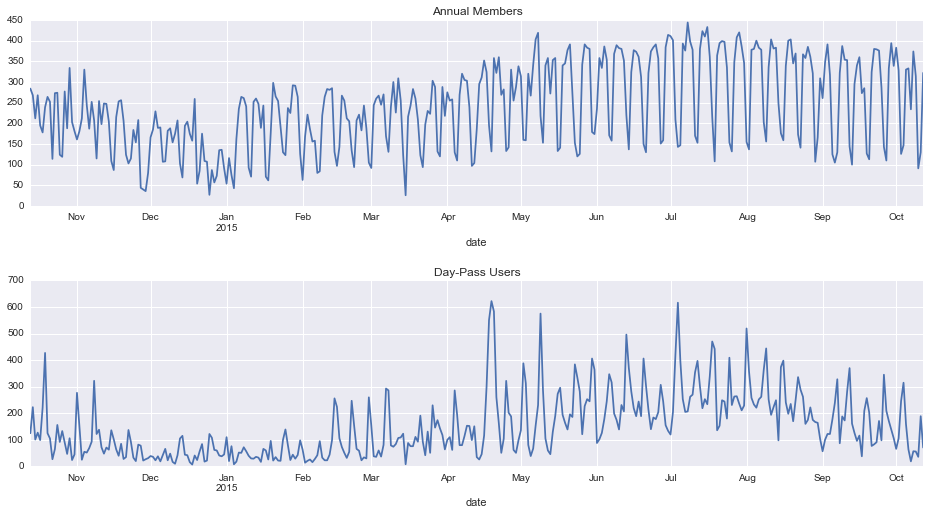

In [8]:
fig, ax = plt.subplots(2, figsize=(16,8))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:,0].plot(ax=ax[0], title='Annual Members');
by_date.iloc[:,1].plot(ax=ax[1], title='Day-Pass Users')

Let's zoom-in on this weekend trend, by averaging all rides by day of week. Because of the change in pattern around January 2015, we'll split the data by both year and by day of week:

In [27]:
by_weekday = by_date.groupby([by_date.index.year,
                              by_date.index.dayofweek]).mean()

In [28]:
by_weekday.head()

usertype  Annual Member  Short-Term Pass Holder
2014 0       211.833333               69.250000
     1       205.416667               62.000000
     2       197.666667               52.000000
     3       179.727273               58.090909
     4       183.000000               65.727273

In [29]:
by_weekday.shape

(14, 2)

In [33]:
by_weekday

Annual Member  Short-Term Pass Holder
2014 0     211.833333               69.250000
     1     205.416667               62.000000
     2     197.666667               52.000000
     3     179.727273               58.090909
     4     183.000000               65.727273
     5     112.636364              131.363636
     6     115.545455              123.090909
2015 0     282.926829              153.487805
     1     320.750000              110.650000
     2     326.650000              117.150000
     3     323.439024              137.268293
     4     291.853659              155.975610
     5     142.317073              288.756098
     6     120.073171              240.463415

In [32]:
by_weekday.columns.name=None #remove label for plot

In [35]:
by_weekday.loc[2014].plot(title='Average Use by Day of Week(2014)', ax=ax[0]);

In [36]:
by_weekday.loc[2015].plot(title='Average Use by Day of Week(2015)', ax=ax[1]);

In [37]:
for axi in ax:
    axi.set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

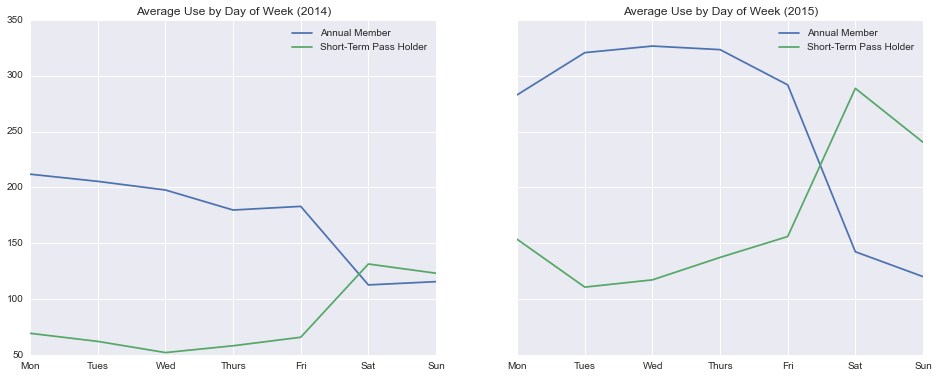

In [39]:
by_weekday = by_date.groupby([by_date.index.year,
                              by_date.index.dayofweek]).mean()
by_weekday.columns.name = None  # remove label for plot

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_weekday.loc[2014].plot(title='Average Use by Day of Week (2014)', ax=ax[0]);
by_weekday.loc[2015].plot(title='Average Use by Day of Week (2015)', ax=ax[1]);
for axi in ax:
    axi.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

The Average hourly trips by weekday and weekend:

In [42]:
#Count trips by date and by hour
by_hour = trips.pivot_table('trip_id', aggfunc = 'count',
                           index = ['date','hour'],
                           columns='usertype').fillna(0).reset_index('hour')

In [43]:
by_hour.shape

(7795, 3)

In [44]:
by_hour.head()

usertype    hour  Annual Member  Short-Term Pass Holder
date                                                   
2014-10-13    10              6                       0
2014-10-13    11             54                       0
2014-10-13    12             35                       7
2014-10-13    13             30                       9
2014-10-13    14             32                      24

In [45]:
# Average these counts by weekend
by_hour['weekend'] = (by_hour.index.dayofweek >=5)
by_hour = by_hour.groupby(['weekend','hour']).mean()

In [48]:
by_hour

usertype      Annual Member  Short-Term Pass Holder
weekend hour                                       
False   0          1.653465                0.975248
        1          1.082192                1.130137
        2          0.723810                1.171429
        3          0.739726                0.643836
        4          1.345679                0.302469
        5          2.934211                0.618421
        6          5.690196                0.764706
        7         20.286822                1.674419
        8         35.373077                3.276923
        9         27.308880                4.544402
        10        14.455939                6.632184
        11        14.582375                8.444444
        12        14.319231                9.600000
        13        12.226054               10.203065
        14         9.766284               11.141762
        15        12.605364               11.057471
        16        20.716475               10.632184
        17        32.915709               10.333333
        18        22.630769                8.830769
        19        13.875969                6.298450
        20         8.664093                4.918919
        21         6.903846                3.465385
        22         4.282869                2.737052
        23         2.903226                1.887097
True    0          2.521277                2.702128
        1          1.946809                1.872340
        2          1.200000                2.082353
        3          0.686275                1.098039
        4          0.766667                0.866667
        5          1.068966                0.568966
        6          1.728395                0.851852
        7          2.063830                2.478723
        8          4.549020                4.450980
        9          6.165049                8.407767
        10         8.500000               13.201923
        11         8.932692               18.509615
        12        10.509615               21.721154
        13        11.134615               24.644231
        14        10.009709               25.320388
        15        10.173077               25.153846
        16        10.365385               22.778846
        17         9.586538               18.057692
        18         8.009709               13.368932
        19         6.000000               10.834951
        20         4.920792                7.693069
        21         4.383838                6.060606
        22         3.410000                3.810000
        23         2.631579                3.273684

In [47]:
by_hour.shape

(48, 2)

In [49]:
by_hour.index.set_levels([['weekday','weekend'],
                         ["{0}.00".format(i) for i in range(24)]], inplace=True);

In [50]:
by_hour.columns.name = None

In [51]:
by_hour.shape

(48, 2)

In [53]:
by_hour.columns.name = None

by_hour

Now we can plot the results to see the hourly trends:

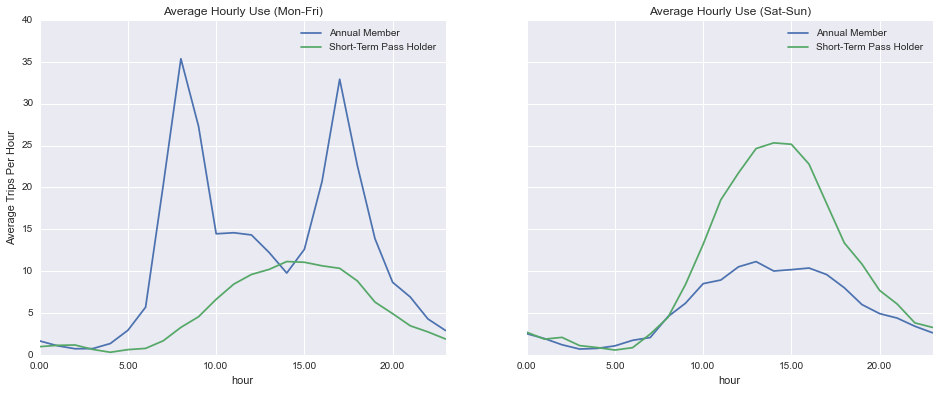

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey= True)
by_hour.loc['weekday'].plot(title='Average Hourly Use (Mon-Fri)',ax=ax[0])
by_hour.loc['weekend'].plot(title='Average Hourly Use (Sat-Sun)',ax=ax[1])
ax[0].set_ylabel('Average Trips Per Hour');

###Observation:###
We see a clear difference between a "commute" pattern, which sharply peaks in the morning and evening (e.g. annual members during weekdays) and a "recreational" pattern, which has a broad peak in the early afternoon (e.g. annual members on weekends, and short-term users all the time). Interestingly, the average behavior of annual pass holders on weekends seems to be almost identical to the average behavior of day-pass users on weekdays!

##Trip Durations:##

Let's take a look at the durations of trips. Pronto rides are designed to be up to 30 minutes; any single use that is longer than this incurs a usage fee of a couple of dollars for the first half hour, and about ten dollars per hour thereafter.

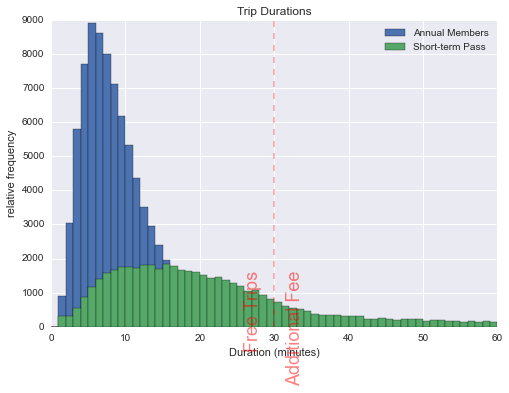

In [71]:
trips['minutes'] = trips.tripduration / 60
trips.groupby('usertype')['minutes'].hist(bins=np.arange(61), alpha=0.5, normed=True);
plt.xlabel('Duration (minutes)')
plt.ylabel('relative frequency')
plt.title('Trip Durations')
plt.text(34, 0.09, "Free Trips\n\nAdditional Fee", ha='right',
         size=18, rotation=90, alpha=0.5, color='red')
plt.legend(['Annual Members', 'Short-term Pass'])

plt.axvline(30, linestyle='--', color='red', alpha=0.3);

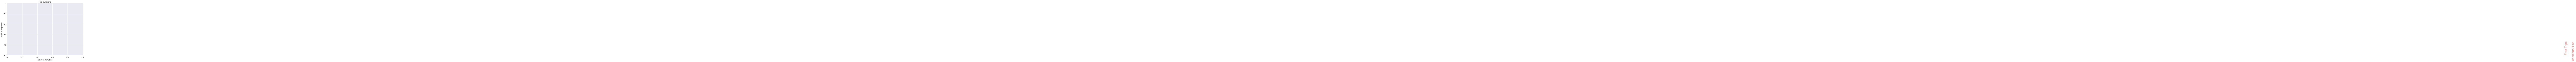